In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Visualize chỉ số Vĩ mô

In [54]:
df1 = pd.read_csv(r'C:\Code\VN-Index\Project\Data preprocessing\Data\Data_preprocessing\vi_mo.csv')

In [55]:
df1.head()

,Unnamed: 0,Thoi gian,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau
0,0,1/2013,99.92,101.25,98.27,100.00
1,1,1/2014,99.94,100.69,98.18,82.65
2,2,1/2015,100.23,99.80,100.55,73.43
3,3,1/2016,100.18,100.00,99.77,44.75
4,4,1/2017,99.93,100.46,99.82,87.61


In [56]:
df1['Thoi gian'] = pd.to_datetime(df1['Thoi gian'], format='%m/%Y')
df = df1.sort_values(by='Thoi gian')
df.head()

,Unnamed: 0,Thoi gian,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau
0,0,2013-01-01,99.92,101.25,98.27,100.00
45,45,2013-02-01,100.03,101.32,99.67,73.56
57,57,2013-03-01,100.41,99.81,97.27,130.18
69,69,2013-04-01,100.01,100.02,97.44,84.07
81,81,2013-05-01,100.21,99.94,95.38,120.45


In [57]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Thoi gian'], y=df['Chi so dau'], mode='lines+markers', name='Giá dầu thô',
                         text=df['Chi so dau'], textposition="top center"))
fig.add_trace(go.Scatter(x=df['Thoi gian'], y=df['Chi so do la My'], mode='lines+markers', name='Chỉ số đô la Mỹ',
                         text=df['Chi so do la My'], textposition="top center"))
fig.add_trace(go.Scatter(x=df['Thoi gian'], y=df['Chi so gia tieu dung'], mode='lines+markers', name='Chỉ số giá tiêu dùng (CPI)',
                         text=df['Chi so gia tieu dung'], textposition="top center"))
fig.add_trace(go.Scatter(x=df['Thoi gian'], y=df['Chi so gia vang'], mode='lines+markers', name='Chỉ số giá vàng',
                         text=df['Chi so gia vang'], textposition="top center"))

fig.update_layout(title='Phân tích các chỉ số kinh tế vĩ mô theo thời gian',
                  xaxis_title='Thời gian',
                  yaxis_title='Chỉ số',
                  legend_title='Chỉ số',
                  hovermode="x unified")

fig.show()

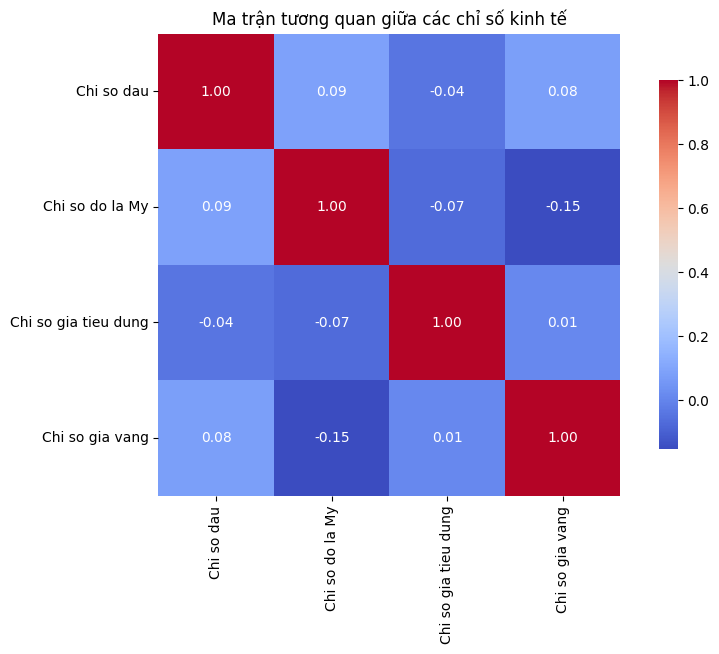

In [60]:
correlation_matrix = df[['Chi so dau', 'Chi so do la My', 'Chi so gia tieu dung', 'Chi so gia vang']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Ma trận tương quan giữa các chỉ số kinh tế')
plt.show()


# GDP

In [3]:
df_GDP = pd.read_csv(r'C:\Code\VN-Index\Project\Data preprocessing\Data\Data_preprocessing\GDP(%).csv')

In [4]:
df_GDP.head()

,Chỉ tiêu,Date,Value
0,GDP theo giá hiện hành,Quý 1/2013,100.00
1,GDP theo giá hiện hành,Quý 2/2013,121.47
2,GDP theo giá hiện hành,6 tháng/2013,182.33
3,GDP theo giá hiện hành,Quý 3/2013,59.89
4,GDP theo giá hiện hành,9 tháng/2013,266.98


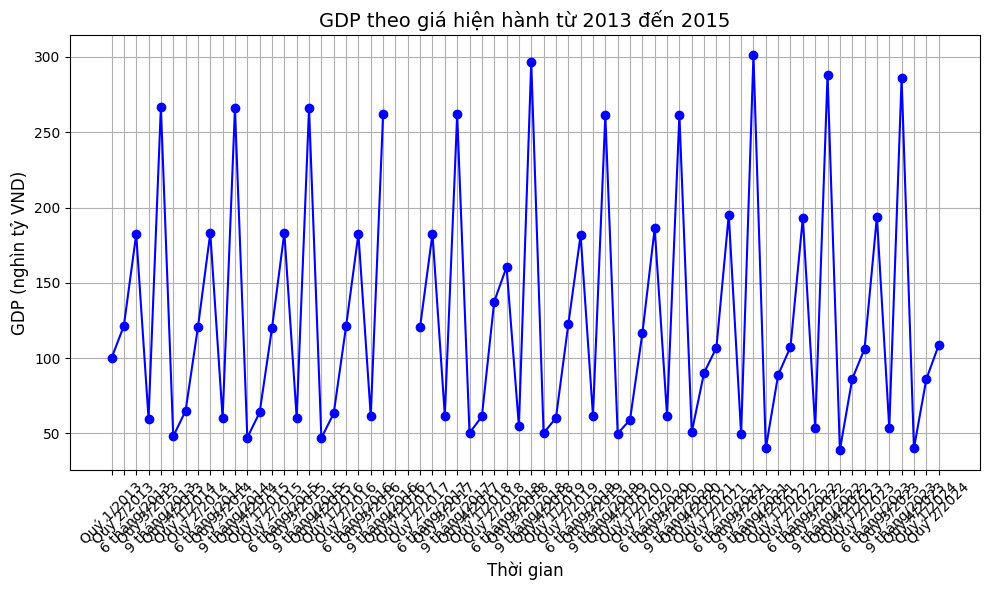

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df_GDP['Date'], df_GDP['Value'], marker='o', linestyle='-', color='b')

plt.title('GDP theo giá hiện hành từ 2013 đến 2015', fontsize=14)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('GDP (nghìn tỷ VND)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()